In [2]:
#Варіант 20
#Завдання 1.
#Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за посиланням
#https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)


In [22]:
import numpy as np
import pandas as pd
import requests



In [23]:
#Провести попередній аналіз даних, а саме:
#1. Вивести перших 5 рядків.
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html) # зчитати всі таблиці
df = tables[2] !
df.head()

/tmp/ipython-input-1463505257.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html) # зчитати всі таблиці


,Country/Territory,IMF (2025)[1][6],World Bank (2022–24)[7],United Nations (2023)[8]
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778


In [27]:
#2. Визначити розмір датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[1][6]          222 non-null    object
 2   World Bank (2022–24)[7]   222 non-null    object
 3   United Nations (2023)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


In [34]:
#3. Визначити оптимальну кількість стовпців
df.columns

Index(['Country/Territory', 'IMF (2025)[1][6]', 'World Bank (2022–24)[7]',
       'United Nations (2023)[8]'],
      dtype='object')

In [37]:
#4. Змінити назви стовпців на більш зручні, наприкла
#Поточні назви стовпців
df.columns = ["Country", "MVF_2024", "WorldBank_2023", "OON_2022"]


In [41]:
# 5. Типи даних
print("Типи даних:\n", df.dtypes, "\n")

# 6. Замінюємо символ "—" на NaN
df = df.replace("—", np.nan)

# 7. Приводимо числові колонки до float
for col in ["MVF_2024", "WorldBank_2023", "OON_2022"]:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

#8. Перевірка пропусків
print("Кількість пропусків до заміни:\n", df.isna().sum(), "\n")
# Замінюємо пропуски середнім
df = df.fillna(df.mean(numeric_only=True))

print("Кількість пропусків після заміни:\n", df.isna().sum(), "\n")
# Видалення дублікатів
df = df.drop_duplicates()
print("Розмір після видалення дублікатів:", df.shape, "\n")

Типи даних:
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object 

Кількість пропусків до заміни:
 Country            0
MVF_2024          32
WorldBank_2023    12
OON_2022           9
dtype: int64 

Кількість пропусків після заміни:
 Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64 

Розмір після видалення дублікатів: (222, 4) 



In [42]:
#9.Описова статистика
print("Описова статистика:\n", df.describe(), "\n")

# 10. Відхилення між MVF_2024 та WorldBank_2023
df["Diff_MVF_WB"] = df["MVF_2024"] - df["WorldBank_2023"]
max_diff = df.loc[df["Diff_MVF_WB"].abs().idxmax()]
print("Найбільше відхилення між MVF_2024 та WorldBank_2023:\n", max_diff, "\n")

#11. Кореляція
print("Кореляція:\n", df[["MVF_2024", "WorldBank_2023", "OON_2022"]].corr(), "\n")

#12.Середнє значення по роках
print("Середні значення:\n", df[["MVF_2024", "WorldBank_2023", "OON_2022"]].mean(), "\n")

#13.Стандартне відхилення для кожної країни
df["Std_Dev"] = df[["MVF_2024", "WorldBank_2023", "OON_2022"]].std(axis=1)
max_var = df.loc[df["Std_Dev"].idxmax()]
print("Країна з найбільшою варіативністю:\n", max_var, "\n")


Описова статистика:
            MVF_2024  WorldBank_2023      OON_2022
count  2.220000e+02    2.220000e+02  2.220000e+02
mean   1.194913e+06    1.053086e+06  9.672422e+05
std    7.990341e+06    7.812285e+06  7.109223e+06
min    6.500000e+01    6.200000e+01  6.800000e+01
25%    1.752200e+04    9.698750e+03  8.888000e+03
50%    8.912300e+04    4.432300e+04  4.088750e+04
75%    6.845312e+05    3.660632e+05  2.987810e+05
max    1.137957e+08    1.113264e+08  1.008348e+08 

Найбільше відхилення між MVF_2024 та WorldBank_2023:
 Country                 World
MVF_2024          113795678.0
WorldBank_2023    111326370.0
OON_2022          100834796.0
Diff_MVF_WB         2469308.0
Name: 0, dtype: object 

Кореляція:
                 MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.998802  0.998855
WorldBank_2023  0.998802        1.000000  0.999120
OON_2022        0.998855        0.999120  1.000000 

Середні значення:
 MVF_2024          1.194913e+06
WorldBank_2023    1.053086e+06

In [43]:
#14.Країни з найвищим та найнижчим показником у кожному році
for col in ["MVF_2024", "WorldBank_2023", "OON_2022"]:
    max_country = df.loc[df[col].idxmax()]
    min_country = df.loc[df[col].idxmin()]
    print(f"{col}: Найвищий показник -> {max_country['Country']} ({max_country[col]})")
    print(f"{col}: Найнижчий показник -> {min_country['Country']} ({min_country[col]})\n")


MVF_2024: Найвищий показник -> World (113795678.0)
MVF_2024: Найнижчий показник -> Tuvalu (65.0)

WorldBank_2023: Найвищий показник -> World (111326370.0)
WorldBank_2023: Найнижчий показник -> Tuvalu (62.0)

OON_2022: Найвищий показник -> World (100834796.0)
OON_2022: Найнижчий показник -> Tuvalu (68.0)



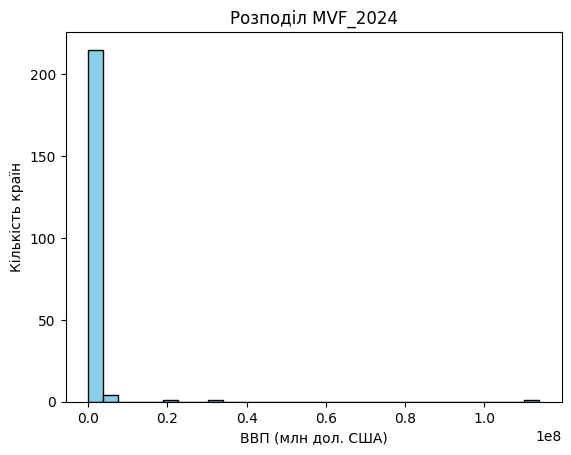

In [44]:
#15.Гістограма для MVF_2024
plt.hist(df["MVF_2024"], bins=30, color="skyblue", edgecolor="black")
plt.title("Розподіл MVF_2024")
plt.xlabel("ВВП (млн дол. США)")
plt.ylabel("Кількість країн")
plt.show()

Частки країн (%):
          Country  MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
0          World       42.897958             47.619116       46.959366
1  United States       11.500413             12.483643       12.909695
2     China[n 1]        7.249844              8.017537        8.287136
3        Germany        1.788665              1.993254        2.107647
4          India        1.578395              1.673625        1.665261 



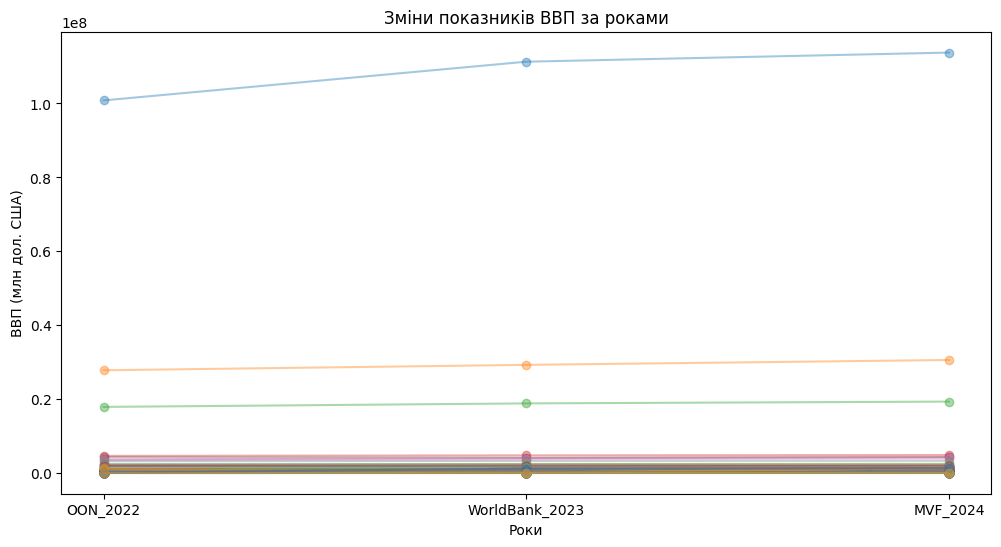

In [45]:
#16.Частки кожної країни
for col in ["MVF_2024", "WorldBank_2023", "OON_2022"]:
    df[f"{col}_Share"] = df[col] / df[col].sum() * 100

print("Частки країн (%):\n", df[["Country", "MVF_2024_Share", "WorldBank_2023_Share", "OON_2022_Share"]].head(), "\n")

# 20. Візуалізація змін по роках
plt.figure(figsize=(12,6))
for i in range(len(df)):
    plt.plot(["OON_2022", "WorldBank_2023", "MVF_2024"],
             [df.iloc[i]["OON_2022"], df.iloc[i]["WorldBank_2023"], df.iloc[i]["MVF_2024"]],
             marker="o", alpha=0.4)

plt.title("Зміни показників ВВП за роками")
plt.xlabel("Роки")
plt.ylabel("ВВП (млн дол. США)")
plt.show()

Висновок:
Дані про ВВП з різних джерел (МВФ, Світовий банк, ООН) добре узгоджуються між собою, кореляція між ними висока. Лідерами за ВВП залишаються США та Китай, а найменші показники мають малі країни та острівні держави. Розподіл ВВП є дуже нерівномірним: кілька економік формують основну частину світового продукту, більшість країн мають значно менші значення. Загалом простежується тенденція до зростання середніх показників у світі.

In [ ]:
#Завдання 2. Завантажити датасет Титанік з Kaggle (або використовуйте вже завантажений файл titanic.csv)


